In [1]:
import os
import sys
import matplotlib.pyplot as plt
import pandas as pd

pd.set_option("display.max_rows", 200)
pd.set_option("display.max_columns", 200)

sys.path.append('.')

In [2]:
from hea4f3 import Hea4Feature3data


def make_df_hea4(calctyle="asa",polytype="bcc"):
    """make dataframe of hea4 dataset

    Args:
        calctyle (str, optional): calculation type, asa or mt. Defaults to "asa".
        polytype (str, optional): polytpe, bcc or fcc. Defaults to "bcc".

    Returns:
        DataFrame: hea4 data
    """    
    hea4 = Hea4Feature3data(calctyle)
    df_hea4_polytype = hea4.df_conv[polytype]
    df_hea4_polytype.reset_index(drop=True, inplace=True)
    
    return df_hea4_polytype

g_calctype="asa"
g_polytype="fcc"

g_hea4 = Hea4Feature3data(g_calctype)

g_df_calc_polytype = make_df_hea4(g_calctype, g_polytype)

index to delete [14954, 14955, 35634, 35635, 103578, 103579, 119432, 119433, 144840, 144841]
len(bcc) 73494 hen(fcc) 73494
index to delete [14954, 14955, 35634, 35635, 103578, 103579, 119432, 119433, 144840, 144841]
len(bcc) 73494 hen(fcc) 73494


In [3]:
g_df_calc_polytype.columns

Index(['heakey', 'element1', 'element2', 'element3', 'element4', 'polytyp',
       'ewidth', 'edelt', 'conv', 'lattice constant', 'volume', 'moment1',
       'moment2', 'moment3', 'moment4', 'total moment', 'TC(K)',
       'resistivity(micro ohm cm)', 'TE(Ry)', 'material name',
       'total magnetic moment per volume'],
      dtype='object')

In [4]:
g_target_list = ['total magnetic moment per volume',
            'TC(K)', 'resistivity(micro ohm cm)']

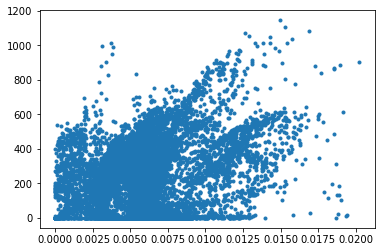

In [5]:
# check contents of hea4
def show_xy(df, name1, name2):
    """plot name1 vs name2 of df

    Args:
        df (DataFrame): dataset
        name1 (str): x axis column of df
        name2 (str): y axis columns of df
    """    
    x = df[name1].astype(float).values
    y = df[name2].astype(float).values
    plt.scatter(x=x, y=y, marker=".")
    
show_xy(g_df_calc_polytype, g_target_list[0], g_target_list[1])

In [8]:
from pymatgen.core.periodic_table import Element

g_elements_exist = list(g_hea4.elements_exist(g_df_calc_polytype))
g_z_exist = []
for symbol in g_elements_exist:
    z = Element(symbol).Z
    g_z_exist.append(z)

# make element class

In [9]:
import numpy as np
import pandas as pd
import json
import sys

sys.path.append('.')
from PeriodicTable import PeriodicTable
        
g_ptable = PeriodicTable()
print(g_ptable.df.columns)
g_ptable.df

configuration warning: Lr 7p1 (tentative)
Index(['symbol', 'row', 'group', 'valence_config', 's1', 's2', 'p1', 'p2',
       'p3', 'p4', 'p5', 'p6', 'd1', 'd2', 'd3', 'd4', 'd5', 'd6', 'd7', 'd8',
       'd9', 'd10', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9',
       'f10', 'f11', 'f12', 'f13', 'f14', 'group1', 'group2', 'group3',
       'group4', 'group5', 'group6', 'group7', 'group8', 'group9', 'group10',
       'group11', 'group12', 'group13', 'group14', 'group15', 'group16',
       'group17', 'group18', 'row1', 'row2', 'row3', 'row4', 'row5', 'row6',
       'row7', 'row8', 'row9'],
      dtype='object')


symbol  row  group                                  valence_config   s1  \
z                                                                             
1        H    1      1                                     [[1, "s1"]]  1.0   
2       He    1     18                                     [[1, "s2"]]  0.0   
3       Li    2      1                                     [[2, "s1"]]  1.0   
4       Be    2      2                                     [[2, "s2"]]  0.0   
5        B    2     13                          [[2, "s2"], [2, "p1"]]  0.0   
6        C    2     14                          [[2, "s2"], [2, "p2"]]  0.0   
7        N    2     15                          [[2, "s2"], [2, "p3"]]  0.0   
8        O    2     16                          [[2, "s2"], [2, "p4"]]  0.0   
9        F    2     17                          [[2, "s2"], [2, "p5"]]  0.0   
10      Ne    2     18                          [[2, "s2"], [2, "p6"]]  0.0   
11      Na    3      1                                     [[3, "s1"]]  1.0   
12      Mg    3      2                                     [[3, "s2"]]  0.0   
13      Al    3     13                          [[3, "s2"], [3, "p1"]]  0.0   
14      Si    3     14                          [[3, "s2"], [3, "p2"]]  0.0   
15       P    3     15                          [[3, "s2"], [3, "p3"]]  0.0   
16       S    3     16                          [[3, "s2"], [3, "p4"]]  0.0   
17      Cl    3     17                          [[3, "s2"], [3, "p5"]]  0.0   
18      Ar    3     18                          [[3, "s2"], [3, "p6"]]  0.0   
19       K    4      1                                     [[4, "s1"]]  1.0   
20      Ca    4      2                                     [[4, "s2"]]  0.0   
21      Sc    4      3                          [[3, "d1"], [4, "s2"]]  0.0   
22      Ti    4      4                          [[3, "d2"], [4, "s2"]]  0.0   
23       V    4      5                          [[3, "d3"], [4, "s2"]]  0.0   
24      Cr    4      6                          [[3, "d5"], [4, "s1"]]  1.0   
25      Mn    4      7                          [[3, "d5"], [4, "s2"]]  0.0   
26      Fe    4      8                          [[3, "d6"], [4, "s2"]]  0.0   
27      Co    4      9                          [[3, "d7"], [4, "s2"]]  0.0   
28      Ni    4     10                          [[3, "d8"], [4, "s2"]]  0.0   
29      Cu    4     11                         [[3, "d10"], [4, "s1"]]  1.0   
30      Zn    4     12                         [[3, "d10"], [4, "s2"]]  0.0   
31      Ga    4     13              [[3, "d10"], [4, "s2"], [4, "p1"]]  0.0   
32      Ge    4     14              [[3, "d10"], [4, "s2"], [4, "p2"]]  0.0   
33      As    4     15              [[3, "d10"], [4, "s2"], [4, "p3"]]  0.0   
34      Se    4     16              [[3, "d10"], [4, "s2"], [4, "p4"]]  0.0   
35      Br    4     17              [[3, "d10"], [4, "s2"], [4, "p5"]]  0.0   
36      Kr    4     18              [[3, "d10"], [4, "s2"], [4, "p6"]]  0.0   
37      Rb    5      1                                     [[5, "s1"]]  1.0   
38      Sr    5      2                                     [[5, "s2"]]  0.0   
39       Y    5      3                          [[4, "d1"], [5, "s2"]]  0.0   
40      Zr    5      4                          [[4, "d2"], [5, "s2"]]  0.0   
41      Nb    5      5                          [[4, "d4"], [5, "s1"]]  1.0   
42      Mo    5      6                          [[4, "d5"], [5, "s1"]]  1.0   
43      Tc    5      7                          [[4, "d5"], [5, "s2"]]  0.0   
44      Ru    5      8                          [[4, "d7"], [5, "s1"]]  1.0   
45      Rh    5      9                          [[4, "d8"], [5, "s1"]]  1.0   
46      Pd    5     10                                    [[4, "d10"]]  0.0   
47      Ag    5     11                         [[4, "d10"], [5, "s1"]]  1.0   
48      Cd    5     12                         [[4, "d10"], [5, "s2"]]  0.0   
49      In    5     13              [[4, "d10"], [5, "

In [10]:
def make_additional_features_df(df):
    features_list = []
    columns = ["z", "X", "atomic_radius", "atomic_radius_calculated", 
                    "electrical_resistivity", 
                    "thermal_conductivity", "boiling_point", "melting_point", 
                    "molar_volume"] 
    for z, symbol in zip(df.index, df["symbol"].values):
        elm = Element(symbol)
        features = [z, elm.X, elm.atomic_radius, elm.atomic_radius_calculated, 
                    elm.electrical_resistivity,  
                    elm.thermal_conductivity, elm.boiling_point, elm.melting_point, 
                    elm.molar_volume]
        features_list.append(features)
    df_additional_features = pd.DataFrame(features_list, columns=columns)
    df_additional_features.set_index("z", drop=True, inplace=True)
    df_additional_features["log_electrical_resistivity"] = \
        np.log(df_additional_features["electrical_resistivity"].values)
    del df_additional_features["electrical_resistivity"]
    return df_additional_features
g_df_additional_features = make_additional_features_df(g_ptable.df)

print(g_df_additional_features.shape)
df_ = pd.concat([g_ptable.df,g_df_additional_features], axis=1)
g_ptable.df = df_

(103, 8)


/home/kino/anaconda3/lib/python3.8/site-packages/pymatgen/core/periodic_table.py:438: UserWarning: No electronegativity for He. Setting to NaN. This has no physical meaning, and is mainly done to avoid errors caused by the code expecting a float.
  warnings.warn("No electronegativity for %s. Setting to NaN. "
/home/kino/anaconda3/lib/python3.8/site-packages/pymatgen/core/periodic_table.py:438: UserWarning: No electronegativity for Ne. Setting to NaN. This has no physical meaning, and is mainly done to avoid errors caused by the code expecting a float.
  warnings.warn("No electronegativity for %s. Setting to NaN. "
/home/kino/anaconda3/lib/python3.8/site-packages/pymatgen/core/periodic_table.py:438: UserWarning: No electronegativity for Ar. Setting to NaN. This has no physical meaning, and is mainly done to avoid errors caused by the code expecting a float.
  warnings.warn("No electronegativity for %s. Setting to NaN. "


In [11]:
g_ptable.df

symbol  row  group                                  valence_config   s1  \
z                                                                             
1        H    1      1                                     [[1, "s1"]]  1.0   
2       He    1     18                                     [[1, "s2"]]  0.0   
3       Li    2      1                                     [[2, "s1"]]  1.0   
4       Be    2      2                                     [[2, "s2"]]  0.0   
5        B    2     13                          [[2, "s2"], [2, "p1"]]  0.0   
6        C    2     14                          [[2, "s2"], [2, "p2"]]  0.0   
7        N    2     15                          [[2, "s2"], [2, "p3"]]  0.0   
8        O    2     16                          [[2, "s2"], [2, "p4"]]  0.0   
9        F    2     17                          [[2, "s2"], [2, "p5"]]  0.0   
10      Ne    2     18                          [[2, "s2"], [2, "p6"]]  0.0   
11      Na    3      1                                     [[3, "s1"]]  1.0   
12      Mg    3      2                                     [[3, "s2"]]  0.0   
13      Al    3     13                          [[3, "s2"], [3, "p1"]]  0.0   
14      Si    3     14                          [[3, "s2"], [3, "p2"]]  0.0   
15       P    3     15                          [[3, "s2"], [3, "p3"]]  0.0   
16       S    3     16                          [[3, "s2"], [3, "p4"]]  0.0   
17      Cl    3     17                          [[3, "s2"], [3, "p5"]]  0.0   
18      Ar    3     18                          [[3, "s2"], [3, "p6"]]  0.0   
19       K    4      1                                     [[4, "s1"]]  1.0   
20      Ca    4      2                                     [[4, "s2"]]  0.0   
21      Sc    4      3                          [[3, "d1"], [4, "s2"]]  0.0   
22      Ti    4      4                          [[3, "d2"], [4, "s2"]]  0.0   
23       V    4      5                          [[3, "d3"], [4, "s2"]]  0.0   
24      Cr    4      6                          [[3, "d5"], [4, "s1"]]  1.0   
25      Mn    4      7                          [[3, "d5"], [4, "s2"]]  0.0   
26      Fe    4      8                          [[3, "d6"], [4, "s2"]]  0.0   
27      Co    4      9                          [[3, "d7"], [4, "s2"]]  0.0   
28      Ni    4     10                          [[3, "d8"], [4, "s2"]]  0.0   
29      Cu    4     11                         [[3, "d10"], [4, "s1"]]  1.0   
30      Zn    4     12                         [[3, "d10"], [4, "s2"]]  0.0   
31      Ga    4     13              [[3, "d10"], [4, "s2"], [4, "p1"]]  0.0   
32      Ge    4     14              [[3, "d10"], [4, "s2"], [4, "p2"]]  0.0   
33      As    4     15              [[3, "d10"], [4, "s2"], [4, "p3"]]  0.0   
34      Se    4     16              [[3, "d10"], [4, "s2"], [4, "p4"]]  0.0   
35      Br    4     17              [[3, "d10"], [4, "s2"], [4, "p5"]]  0.0   
36      Kr    4     18              [[3, "d10"], [4, "s2"], [4, "p6"]]  0.0   
37      Rb    5      1                                     [[5, "s1"]]  1.0   
38      Sr    5      2                                     [[5, "s2"]]  0.0   
39       Y    5      3                          [[4, "d1"], [5, "s2"]]  0.0   
40      Zr    5      4                          [[4, "d2"], [5, "s2"]]  0.0   
41      Nb    5      5                          [[4, "d4"], [5, "s1"]]  1.0   
42      Mo    5      6                          [[4, "d5"], [5, "s1"]]  1.0   
43      Tc    5      7                          [[4, "d5"], [5, "s2"]]  0.0   
44      Ru    5      8                          [[4, "d7"], [5, "s1"]]  1.0   
45      Rh    5      9                          [[4, "d8"], [5, "s1"]]  1.0   
46      Pd    5     10                                    [[4, "d10"]]  0.0   
47      Ag    5     11                         [[4, "d10"], [5, "s1"]]  1.0   
48      Cd    5     12                         [[4, "d10"], [5, "s2"]]  0.0   
49      In    5     13              [[4, "d10"], [5, "

In [12]:
import seaborn as sns
import copy

def show_df_valence(ptable, elem_list, row_list, filename='hot_vector.png'):
    """plot and save a figure of pstable.df within the range of row_list and of elem_list

    Args:
        ptable (PeriodicTable): periodic table class
        elem_list (list): a list of elements
        row_list (list): a list of row in the DataFrame
        filename (str, optional): filename to save. Defaults to 'hot_vector.png'.
    """    
    fig, ax = plt.subplots(1,1, figsize=(10,8))
    df_group_row = copy.deepcopy(ptable.df)
    df_group_row.index = ptable.df["symbol"].values
    
    sns.heatmap(df_group_row.loc[elem_list, row_list].T, ax=ax, linewidths=1, linecolor='gray')
    # for _, spine in ax.spines.items():
    #     spine.set_visible(True)
    fig.savefig(filename)
    fig.show()

<ipython-input-12-17effaca249b>:21: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


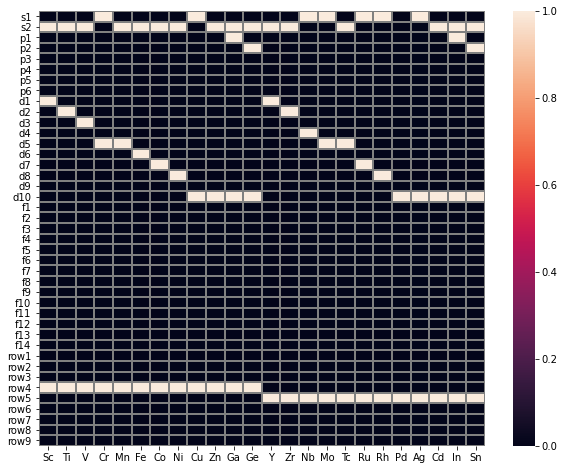

In [13]:
show_df_valence(g_ptable, ['Sc', 'Ti', 'V', 'Cr', 'Mn', 'Fe', 'Co', 'Ni', 'Cu', 'Zn', 'Ga', 'Ge',
                        'Y', 'Zr', 'Nb', 'Mo', 'Tc', 'Ru', 'Rh', 'Pd', 'Ag', 'Cd', 'In', 'Sn'],
               ['s1', 's2', 'p1', 'p2',
       'p3', 'p4', 'p5', 'p6', 'd1', 'd2', 'd3', 'd4', 'd5', 'd6', 'd7', 'd8',
       'd9', 'd10', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9',
       'f10', 'f11', 'f12', 'f13', 'f14', 'row1', 'row2',
       'row3', 'row4', 'row5', 'row6', 'row7', 'row8', 'row9'],
        'electric_configuration_hot_vector.png')

<ipython-input-12-17effaca249b>:21: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


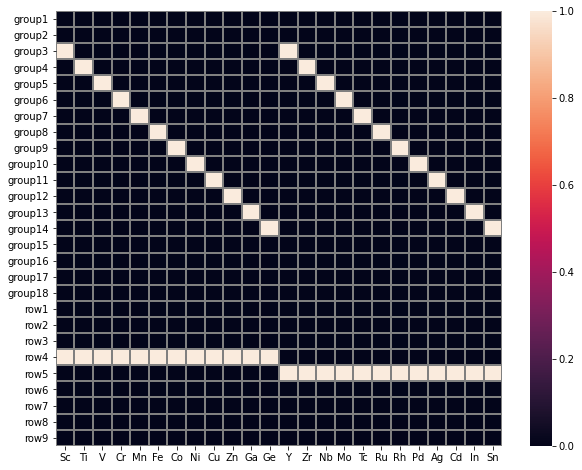

In [14]:
show_df_valence(g_ptable, ['Sc', 'Ti', 'V', 'Cr', 'Mn', 'Fe', 'Co', 'Ni', 'Cu', 'Zn', 'Ga', 'Ge',
                        'Y', 'Zr', 'Nb', 'Mo', 'Tc', 'Ru', 'Rh', 'Pd', 'Ag', 'Cd', 'In', 'Sn'],
               ['group1', 'group2', 'group3', 'group4', 'group5', 'group6', 'group7',
       'group8', 'group9', 'group10', 'group11', 'group12', 'group13',
       'group14', 'group15', 'group16', 'group17', 'group18', 'row1', 'row2',
       'row3', 'row4', 'row5', 'row6', 'row7', 'row8', 'row9'],
        'group_row_hot_vector.png')


In [15]:
from Common import load_save_pickle

In [16]:
g_element_columns_list = g_hea4.element_columns
g_element_columns_list

['element1', 'element2', 'element3', 'element4']

In [17]:

import progressbar
def add_feature_all(df, ptable, feature_list, funcname, func,
                    debug=False, element_columns_list=g_element_columns_list):
    """add features to DataFrame

    Args:
        df (DataFrame): dataset
        ptable (PeriodicTable): periodic table class
        feature_list (list): a list of features
        funcname (str): string name of func, to make columns of the DataFrame
        func (function): function
        debug (bool, optional): debug flag. Defaults to False.
        element_columns_list (list, optional): a list of elements in the DataFrame. Defaults to g_element_columns_list.

    Returns:
        DataFrame: features are added
    """
    columns = []
    for feature in feature_list:
        columns.append("{}_{}".format(feature, funcname))
    if columns[0] in list(ptable.df.columns):
        print("columns exists. skip all")
        return df
    
    print("element_columns_list", element_columns_list)
    
    elements = df[element_columns_list].astype(int).values
    features = np.array(feature_list)
    print("operation {} to {}".format(funcname, features))
    
    val_after_op_list = []
    for element in progressbar.progressbar(elements):
        val = ptable.df.loc[element,features].astype(float).values
        val_after_op = func(val, axis=0)
        val_after_op_list.append(val_after_op)
        if debug:
            print(element)
            print(val)
            print(val_after_op)
            print()
        
    _df = pd.DataFrame(val_after_op_list, index=df.index, columns=columns)
    if debug:
        print(df.shape, _df.shape)
        
    df = pd.concat([df,_df], axis=1)
    
    print("columns added", columns)
    
    return df

In [18]:
g_ptable.df.columns

Index(['symbol', 'row', 'group', 'valence_config', 's1', 's2', 'p1', 'p2',
       'p3', 'p4', 'p5', 'p6', 'd1', 'd2', 'd3', 'd4', 'd5', 'd6', 'd7', 'd8',
       'd9', 'd10', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9',
       'f10', 'f11', 'f12', 'f13', 'f14', 'group1', 'group2', 'group3',
       'group4', 'group5', 'group6', 'group7', 'group8', 'group9', 'group10',
       'group11', 'group12', 'group13', 'group14', 'group15', 'group16',
       'group17', 'group18', 'row1', 'row2', 'row3', 'row4', 'row5', 'row6',
       'row7', 'row8', 'row9', 'X', 'atomic_radius',
       'atomic_radius_calculated', 'thermal_conductivity', 'boiling_point',
       'melting_point', 'molar_volume', 'log_electrical_resistivity'],
      dtype='object')

In [19]:
def make_features(_df,ptable):
    """make all the additional features

    Args:
        _df (DataFrame): data
        ptable (PeriodicTable): periodic table class

    Returns:
        DataFrame: data, features are added.
    """

    phys_feature_list = ['X', 'atomic_radius',
       'atomic_radius_calculated', 'thermal_conductivity', 'boiling_point',
       'melting_point', 'molar_volume', 'log_electrical_resistivity']
    feature_list = ["group","row"]
    for group in range(1,19):
        feature_list.append('group{}'.format(group))
    for row in range(1,10):
        feature_list.append('row{}'.format(row))
    feature_list.extend(['s1', 's2', 'p1', 'p2',
           'p3', 'p4', 'p5', 'p6', 'd1', 'd2', 'd3', 'd4', 'd5', 'd6', 'd7', 'd8',
           'd9', 'd10', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9',
           'f10', 'f11', 'f12', 'f13', 'f14'])
    feature_list.extend(phys_feature_list)

    df_add_feature = add_feature_all(_df, ptable,
                                     feature_list, 'mean', np.mean, debug=False)
    _df = df_add_feature
    
    feature_list = ["group","row"]
    feature_list.extend(phys_feature_list)

    df_add_feature = add_feature_all(_df, ptable, feature_list, "std", np.std)
    _df = df_add_feature
    
    df_add_feature = add_feature_all(_df, ptable, feature_list, "min", np.min)
    _df = df_add_feature   

    df_add_feature = add_feature_all(_df, ptable, feature_list, "max", np.max)
    _df = df_add_feature   
    
    return _df

In [20]:
g_pickle_filename = "df_extend_{}_{}.pickle".format(g_calctype, g_polytype)
status, g_df_calc_polytype_loaded = \
    load_save_pickle(g_pickle_filename, None, action=None)
print(status)
if status == "loaded":
    g_df_calc_polytype = g_df_calc_polytype_loaded
if status != "loaded":
    print(g_df_calc_polytype.shape)
    g_df_calc_polytype = make_features(g_df_calc_polytype, g_ptable)
    status, g_df_calc_polytype_loaded = \
        load_save_pickle(g_pickle_filename, g_df_calc_polytype, action=None)
    print(status)
    

  0% (35 of 73494) |                     | Elapsed Time: 0:00:00 ETA:   0:03:31

nothing
(73494, 21)
element_columns_list ['element1', 'element2', 'element3', 'element4']
operation {} to {} mean ['group' 'row' 'group1' 'group2' 'group3' 'group4' 'group5' 'group6'
 'group7' 'group8' 'group9' 'group10' 'group11' 'group12' 'group13'
 'group14' 'group15' 'group16' 'group17' 'group18' 'row1' 'row2' 'row3'
 'row4' 'row5' 'row6' 'row7' 'row8' 'row9' 's1' 's2' 'p1' 'p2' 'p3' 'p4'
 'p5' 'p6' 'd1' 'd2' 'd3' 'd4' 'd5' 'd6' 'd7' 'd8' 'd9' 'd10' 'f1' 'f2'
 'f3' 'f4' 'f5' 'f6' 'f7' 'f8' 'f9' 'f10' 'f11' 'f12' 'f13' 'f14' 'X'
 'atomic_radius' 'atomic_radius_calculated' 'thermal_conductivity'
 'boiling_point' 'melting_point' 'molar_volume'
 'log_electrical_resistivity']


100% (73494 of 73494) |##################| Elapsed Time: 0:03:02 Time:  0:03:02
  0% (41 of 73494) |                     | Elapsed Time: 0:00:00 ETA:   0:03:02

columns added ['group_mean', 'row_mean', 'group1_mean', 'group2_mean', 'group3_mean', 'group4_mean', 'group5_mean', 'group6_mean', 'group7_mean', 'group8_mean', 'group9_mean', 'group10_mean', 'group11_mean', 'group12_mean', 'group13_mean', 'group14_mean', 'group15_mean', 'group16_mean', 'group17_mean', 'group18_mean', 'row1_mean', 'row2_mean', 'row3_mean', 'row4_mean', 'row5_mean', 'row6_mean', 'row7_mean', 'row8_mean', 'row9_mean', 's1_mean', 's2_mean', 'p1_mean', 'p2_mean', 'p3_mean', 'p4_mean', 'p5_mean', 'p6_mean', 'd1_mean', 'd2_mean', 'd3_mean', 'd4_mean', 'd5_mean', 'd6_mean', 'd7_mean', 'd8_mean', 'd9_mean', 'd10_mean', 'f1_mean', 'f2_mean', 'f3_mean', 'f4_mean', 'f5_mean', 'f6_mean', 'f7_mean', 'f8_mean', 'f9_mean', 'f10_mean', 'f11_mean', 'f12_mean', 'f13_mean', 'f14_mean', 'X_mean', 'atomic_radius_mean', 'atomic_radius_calculated_mean', 'thermal_conductivity_mean', 'boiling_point_mean', 'melting_point_mean', 'molar_volume_mean', 'log_electrical_resistivity_mean']
element_col

100% (73494 of 73494) |##################| Elapsed Time: 0:02:59 Time:  0:02:59
N/A% (0 of 73494) |                      | Elapsed Time: 0:00:00 ETA:  --:--:--

columns added ['group_std', 'row_std', 'X_std', 'atomic_radius_std', 'atomic_radius_calculated_std', 'thermal_conductivity_std', 'boiling_point_std', 'melting_point_std', 'molar_volume_std', 'log_electrical_resistivity_std']
element_columns_list ['element1', 'element2', 'element3', 'element4']
operation {} to {} min ['group' 'row' 'X' 'atomic_radius' 'atomic_radius_calculated'
 'thermal_conductivity' 'boiling_point' 'melting_point' 'molar_volume'
 'log_electrical_resistivity']


100% (73494 of 73494) |##################| Elapsed Time: 0:03:07 Time:  0:03:07
N/A% (0 of 73494) |                      | Elapsed Time: 0:00:00 ETA:  --:--:--

columns added ['group_min', 'row_min', 'X_min', 'atomic_radius_min', 'atomic_radius_calculated_min', 'thermal_conductivity_min', 'boiling_point_min', 'melting_point_min', 'molar_volume_min', 'log_electrical_resistivity_min']
element_columns_list ['element1', 'element2', 'element3', 'element4']
operation {} to {} max ['group' 'row' 'X' 'atomic_radius' 'atomic_radius_calculated'
 'thermal_conductivity' 'boiling_point' 'melting_point' 'molar_volume'
 'log_electrical_resistivity']


100% (73494 of 73494) |##################| Elapsed Time: 0:02:54 Time:  0:02:54


columns added ['group_max', 'row_max', 'X_max', 'atomic_radius_max', 'atomic_radius_calculated_max', 'thermal_conductivity_max', 'boiling_point_max', 'melting_point_max', 'molar_volume_max', 'log_electrical_resistivity_max']
saved


In [21]:
g_df_calc_polytype.shape,g_df_calc_polytype.columns

((73494, 120),
 Index(['heakey', 'element1', 'element2', 'element3', 'element4', 'polytyp',
        'ewidth', 'edelt', 'conv', 'lattice constant',
        ...
        'group_max', 'row_max', 'X_max', 'atomic_radius_max',
        'atomic_radius_calculated_max', 'thermal_conductivity_max',
        'boiling_point_max', 'melting_point_max', 'molar_volume_max',
        'log_electrical_resistivity_max'],
       dtype='object', length=120))